<img align="center" src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="800px"/>
<figure>
<a id='fig_ref'></a>
<img src="./Images/Logo_TalentQ_Azul.png" align=center width='200px'/>
</figure>
<br>
<br>



<table width="100%"><td style=" font_style:italic; font-size:50px;text-align:center;background-color:rgba(0, 220, 170,0.7)">
<div>
Superposición, Paralelismo, Interferencia
</div>
</td></table>

<figure>
<img src="./images/vectors.png" align=center width='40%' style='margin:automatic'/>
</figure>



14 Abril 2025

Autores:


* Javier Mas (IGFAE-USC)
* Carlos Luque (IAC)
* Javier Vizoso (CESGA)


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Licencia: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $


In [81]:
%run macro.py

[Qibo 0.2.16|INFO|2025-04-03 14:41:48]: Using numpy backend on /CPU:0


En este cuaderno vamos a experimentar con dos recursos que ofrece la mecánica cuántica y que se utilizan para obtener ventaja computacional. 

- La **superposición**. Un estado general de un sistema cuántico es una *superposición lineal* de todos los asociados a los posibles resultados que pueden aparecer  al medir. 
<br>

- La **interferencia**. Los coeficientes de la superposición pueden anularse (interferencia destructiva)  en una secuencia de procesos sucesivos. 

#  Superposición

<div class="alert alert-block alert-info">

- El estado de un **bit** sólo puede ser 0 ó 1. 
<br>
    
- El estado de un **cúbit** puede ser una <i>superposición</i> lineal $a \ket{0} + b \ket{1}$ con $|a|^2 + |b|^2 = 1$
<br>
    
    - Los estados $\ket{0}$ y $\ket{1}$ forman una *base*
    
    - Los coficientes  $a$ y $b$ son  *amplitudes* de probabilidad. En general son números complejos.

    - Los números reales y positivos $|a|^2$ y $|b|^2$ son las *probabilidades* de que, al medir, obtengamos 0 ó 1 y (el estado colapse a $\ket{0}$ ó $\ket{1}$).

</div>


## Circuito cuántico


El estado <b>inicial</b> en un circuito cuántico es siempre $\ket{\psi} = \ket{0}$, cuya medida dará siempre el valor cierto 0 
    
- A partir de él, podemos *preparar* un estado arbitrario aplicando **puertas cuánticas**
    
$$
\ket{0} ~~~\stackrel{\hbox{puertas}}{\longrightarrow}~~~ \ket{\psi} = a \ket{0} + b \ket{1} ~~~~~\hbox{con}~~ |a|^2 + |b|^2 = 1
$$
<br>

- Cada vez que **medimos**, el estado *colapsa* a $\ket{0}$ ó a $\ket{1}$
$$
\ket{\psi} = a \ket{0} + b \ket{1} ~~~\stackrel{\hbox{medidas}}{\longrightarrow}~~~
\left\{ \begin{array}{cc}\hbox{mide} & \hbox{sale} \\  0 & \ket{0} \\   1 &   \ket{1} \end{array} \right.
$$
<br>


- Podemos tener acceso a las probabilidades $|a|^2$ y $|b|^2$ midiendo $N$ veces y hallando las <b>frecuencias relativas</b> con las que aparecen 0 y 1


$$
|a|^2 = \frac{n(0)}{N} ~~~~~~,~~~~~~~ |b|^2 = \frac{n(1)}{N}
$$
    
    


## Circuitos de 1 cúbit

- La puerta $X$ es el análogo cuántico de la puerta clásica NOT

$$
X \ket{0} = \ket{1} ~~~~~~~~~~X \ket{1} = \ket{0}
$$

- La puerta $Z$ cambia el signo a $\ket{1}$
$$
Z \ket{0} = \ket{0}~~~~~~~~~~Z\ket{1} = -\ket{1}~~~
$$
<br>
No tiene análogo clásico, ya que no existe un bit que  tome el valor  -1
<br>
<br>

- La puerta $H$ (o de *Hadamard*) crea un estado superposición
<br>
$$
H \ket{0} =\frac{1}{\sqrt{2}} \big( \ket{0} + \ket{1}\big) ~~~~~~~H\ket{1} =\frac{1}{\sqrt{2}} \big( \ket{0} - \ket{1}\big)
$$
<br>
que tampoco tiene análogo clásico


(<Axes: >, <Figure size 60x60 with 1 Axes>)

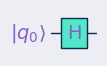

In [82]:
# Creamos un circuito cuántico de nqubit cúbits
nqubits = 1
qc = Circuit(nqubits)

# puedes descomentar o comentar líneas para añadir o quitar puertas al circuito
#qc.add(gates.X(0))
qc.add(gates.H(0))
#qc.add(gates.Y(0))


# visualizamos el circuito
qsplot_circuit(qc)

<u>Podemos analizar el estado resultante $\ket{\psi}$  de **tres manera distintas**:</u> 

- escribiendo el vector resultante en la base $\ket{\psi} = a\ket{0} +  b\ket{1}$

In [83]:
draw_state_Latex(qc)

<IPython.core.display.Latex object>

- Visualizándolo como un vector en la esfera de Bloch

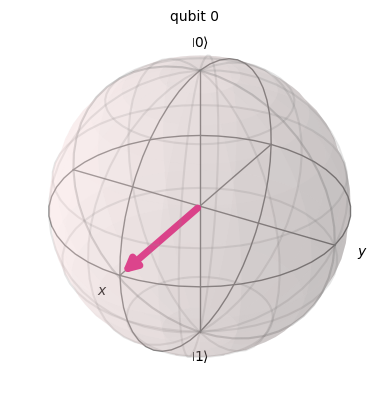

In [84]:
draw_state_Bloch(qc)

- Analizando la estadística de las medidas para recuperar los números $|a|^2$ y $|b|^2$

(<Axes: >, <Figure size 120x60 with 1 Axes>)

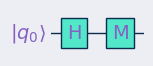

In [85]:
# Añadimos una puerta de medida a una copia del circuito
qcm = qc.copy()
qcm.add(gates.M(0))

# visualizamos el circuito
qsplot_circuit(qcm)

Las **cuentas** se almacenan en un diccionario $\{ \hbox{`medida'} : \hbox{cuentas} \}$



In [86]:
# Ejectuamos un numero de veces 
Nejecuciones = 1000
results = qcm.execute(nshots=Nejecuciones)

#y guardamos los resultados de las medidas
cuentas = results.frequencies()
print("Cuentas: ", cuentas)

Cuentas:  Counter({'0': 504, '1': 496})


Los histogramas permiten visualizar las frecuencias de aparición

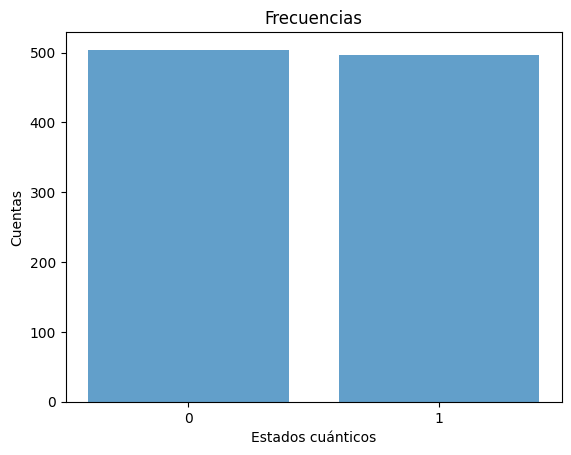

In [87]:
plot_histogram(cuentas)

Las frecuencias relativas tienden a las probabilidades de cada resultado en el límite de Nejecuciones grande

$$p(0) = |a|^2 = \frac{n(0)}{N} ~~~~~~~\hbox{y} ~~~~~~~~~ p(1) = |b|^2 = \frac{n(1)}{N}$$

In [89]:
def probabilidades(cuentas, N):
    return {k: np.round(v/N, 3) for k, v in cuentas.items()}

probabilidades(cuentas,Nejecuciones) 

{'0': 0.504, '1': 0.496}

<div class="alert alert-block alert-success">

<b>¡A jugar!</b>:   
- Modifica el circuito añadiendo puertas y obtén nuevos estados  

- Obten las frecuencias relativa y recupera los valores de $|a|^2$ y $|b|^2$.  Comprueba que siempre suman a 1.     

- Aumenta el parámetro *Nejecuciones* y comprueba cómo las frecuencias relativas tienden a las probabilidades. 
</div>


## Circuitos de varios cúbits 

- Pensemos en 2 cúbits, cada uno de los cuales está en un estado arbitrario. 

El estado **conjunto** se describe mediante el producto *(tensorial)* de ambos estados individuales
<br>
$$
\ket{\psi} = \big(a_1 \ket{0} + b_1\ket{1}\big)\otimes \big( a_2\ket{0} + b_2\ket{1}\big) = 
a_1a_2 \ket{00} + a_1 b_2 \ket{01} +  b_1 a_2\ket{10} + b_1 b_2 \ket{11}
$$
<br>

Decimos que los estados $\{ \ket{00},\ket{01},\ket{10},\ket{11} \}$ forman una **base** del espacio de dos cúbits.
<br>
<br>

- Al medir ambos cúbits obtendremos    
$$
\begin{array}{ccc}
\hbox{resultados} & \hbox{con probabilidad} & \hbox{y el estado colapsa a} \\
00 & |a_1a_2|^2 & \ket{00} \\
01 & |a_1b_2|^2 & \ket{01}\\
10 & |b_1 a_2|^2 & \ket{10}\\
11 & |b_1 b_2 |^2 & \ket{11}\\
\end{array}
$$
<br>


Partiendo de $\ket{00}$, vamos a generar estados $\ket{\psi}$ posibles mediante puertas de 1 cúbit insertadas en cada registro del circuito

(<Axes: >, <Figure size 60x120 with 1 Axes>)

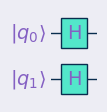

In [90]:
nqubits = 2

#generamos el circuito con las puertas que queramos
qc2 = Circuit(nqubits)

# comenta o descomenta las puertas que quieras añadir al circuito
#qc2.add(gates.X(0))
#qc2.add(gates.X(1))
qc2.add(gates.H(0))
qc2.add(gates.H(1))

#visualizamos el circuito
qsplot_circuit(qc2)

De nuevo visualizamos el resultado de <u>tres formas distintas</u>

- **Algebraicamente**: como *superposición* de los estados posibles al medir

In [91]:
draw_state_Latex(qc2)

<IPython.core.display.Latex object>

- **Gráficamente**: sobre la esfera de Bloch

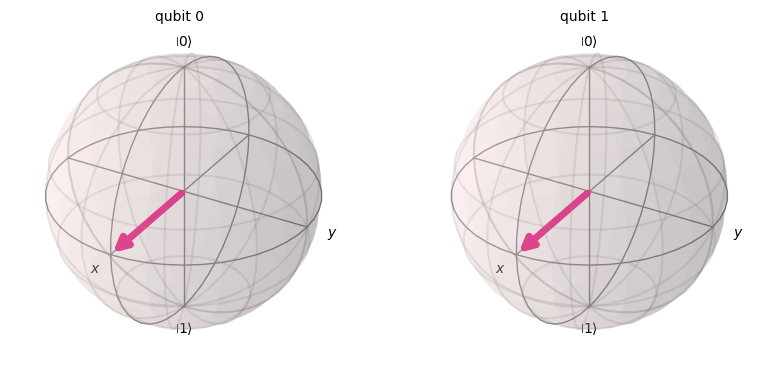

In [92]:
draw_state_Bloch(qc2)

- **Estadísticamente**: haciendo medidas para recuperar los valores $|a_1a_2|^2 , |a_1b_2|^2  ,|b_1a_2|^2  ,|b_1b_2|^2$



(<Axes: >, <Figure size 120x120 with 1 Axes>)

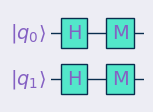

In [93]:
# Copiamos el circuito y añadimos  puertas de medida a todos los cúbits
qc2m = qc2.copy()
qc2m.add(gates.M(*range(nqubits)))

#visualizamos el circuito
qsplot_circuit(qc2m)

Medidas =  Counter({'00': 2534, '10': 2516, '01': 2480, '11': 2470})


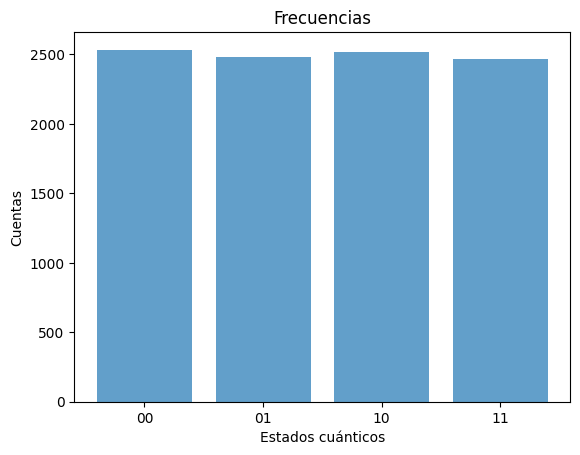

In [94]:
#ejecutamos un numero de veces y guardamos los resultados de las medidas
Nejecuciones = 10000
result2 = qc2m.execute(nshots=Nejecuciones)

cuentas2 = result2.frequencies()
print("Medidas = ",cuentas2)

# graficamos en un histograma
plot_histogram(cuentas2)

Escribimos las probabilidades

In [95]:
print('Probabilidades = ', probabilidades(cuentas2,Nejecuciones) )

Probabilidades =  {'00': 0.253, '01': 0.248, '10': 0.252, '11': 0.247}


<div class="alert alert-block alert-success">
<b>Juega:</b> 

modifica el circuito cambiando las puertas y obtén las nuevas probabilidades
</div>

# Paralelismo

En la sección anterior hemos puesto $n=2$. Ahora podemos volver y aumentar este valor a voluntad. 

<u>Vamos a fijarnos en un **circuito concreto**</u>, en el que aplicamos la puerta $H$ a cada uno de los cúbits en el estado $\ket{0}$

(<Axes: >, <Figure size 60x180 with 1 Axes>)

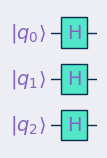

In [96]:
nqubits = 3
# creamos el circuito cuántico
qc3 = Circuit(nqubits)

# aplicamos H a todos los cúbits
for i in range(nqubits):
    qc3.add(gates.H(i))

#visualizamos el circuito
qsplot_circuit(qc3)

Observemos el estado $\ket{\psi}$ que crea este circuito

In [97]:
draw_state_Latex(qc3)

<IPython.core.display.Latex object>

obtenemos las probabilidades y vemos que son iguales para todos los estados

(<Axes: >, <Figure size 120x180 with 1 Axes>)

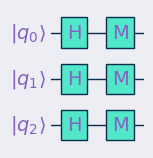

In [98]:
# Añadimos puertas de medida a todos los cúbits en una copia del circuito
qc3m = qc3.copy()
qc3m.add(gates.M(*range(nqubits)))

# graficamos el circuito
qsplot_circuit(qc3m)

Cuentas=  Counter({'001': 1295, '100': 1284, '110': 1280, '010': 1245, '101': 1235, '111': 1235, '000': 1222, '011': 1204})


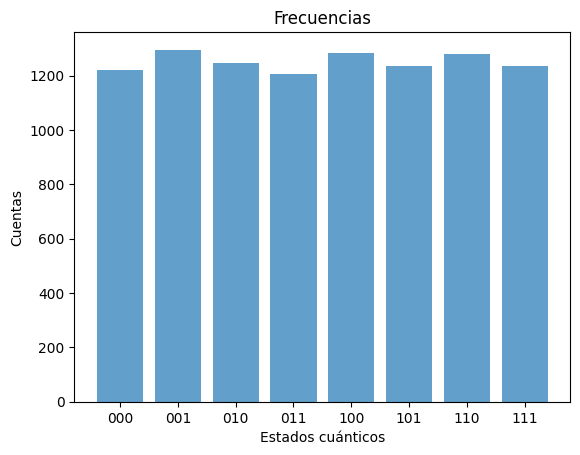

In [100]:
# ejecutamos un numero de veces
Nejecuciones = 10000 
cuentas3 = qc3m.execute(nshots=Nejecuciones).frequencies()
print("Cuentas= ",cuentas3)

# graficamos en un histograma
plot_histogram(cuentas3)

In [101]:
probabilidades(cuentas3,Nejecuciones) 

{'000': 0.122,
 '001': 0.13,
 '010': 0.124,
 '011': 0.12,
 '100': 0.128,
 '101': 0.124,
 '110': 0.128,
 '111': 0.124}

<div class="alert alert-block alert-success">

<b>Ejercicio:</b> repite las celdas anteriores, subiendo el valor de $nqubits$.
</div>

<div class="alert alert-block alert-danger">
<b>Observa:</b> 

El estado $H^n \ket{0}_n$ es muy importante en computación cuántica. Consiste en una *superposición uniforme* de **todos los estados de la base** 


</div>

<div class="alert alert-block alert-warning">
<b> Notación </b>  
<br>

Un número entero $x$ lo expresaremos de forma indistinta como un número decimal $x \in \mathbb{N}$, o como una n-tupla $ x \in \{ 0,1\}^n$ que se obtiene completando con 0's el número $x$ escrito en base 2

*Ejemplo*: con $n=4$, podemos escribir de forma indistinta $x = 7$ ó $x = 0111$. De este modo el vector $\ket{0111} $   de la base de $n=4$ cúbits puede respresentarse como $\ket{7}$.  
</div>

In [102]:
n=4
x=7
xn = format(x, '0' + str(n) + 'b')
print(' |' + xn + ' > = |' + str(x) + ' >')

 |0111 > = |7 >


Con esta notación podemos escribir el efecto de $H^n$ así

\begin{align}
H^n \ket{000} =  H\ket{0}H\ket{0}\, ...\, H\ket{0} &=\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\, ...\, \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) 
\nonumber \\
 &= \frac{1}{\sqrt{2}^3}\left(
    \ket{00...0} + \ket{00...1} + ... + \ket{11...0}+ \ket{11...1}\right) \nonumber\\
&= \frac{1}{\sqrt{2}^3}\left(
    \ket{0} + \ket{1} + \ket{2} + ... + \ket{2^n-1}\right)
\end{align}

- En un *computador clásico*, la operación anterior requeriría 

    -   disponer de $2^n$ **registros** de 64 bits de memoria vacíos (en el estado 00..0)

    -  modificar **sucesivamente** todos estos registros hasta poner todos ellos a valer $1/\sqrt{2}^{n}$ .

El coste en <u>espacio</u> y en <u>tiempo</u> de esta operación crece **exponencialmente** con $n$.


- En un *computador cuántico* los dos requisitos son satisfechos fácilmente 

    - el estado de $n$ cúbits alberga de forma natural $2^n$ **amplitudes** no nulas  

    - el proceso de cambiar todas las $2^n$ amplitudes se realiza **en un sólo paso** (paralelismo cuántico).

# Interferencia

<div class="alert alert-block alert-info">

Las <b>probabilidades</b> $|a|^2$ y $|b|^2$ son siempre números positivos. Por tanto, es **imposible** que una suma de probabilidades se anule.

Las **amplitudes de probabilidad**, $a$ y $b$ son números reales, o incluso complejos. Por tanto, es **posible** conseguir que un resultado tenga  tenga una probabilidad nula, $a + b = 0$, a pesar de que todas las amplitudes que contribuyen no sean nulas. Este es el fenómeno de la interferencia. 
</div>






## La moneda cuántica

Un cúbit es un análogo cuántico de una moneda. Cuando lo medimos, el resultado es siempre $\ket{0} \sim \hbox{Cara}$, ó bien $\ket{1} \sim \hbox{Cruz}$. 

Vamos a comprobar, experimentalmente, que <b>actuar con la puerta $H$</b>  es el <i>análogo cuántico</i> de  <b>tirar la moneda al aire</b>




Basta con comproba que, **al medir**, la probabilidad de cada resultado 0 ó 1, es igual a $1/2$ al igual que en el caso de una moneda. 

Medidas=  Counter({'1': 520, '0': 480})


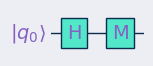

In [103]:
nqubits = 1

# creamos el circuito cuántico
qc4 = Circuit(nqubits)#

# descomenta esta línea si quieres tirar una moneda cuántica desde el estado |1>
# qc4.add(gates.X(0))

qc4.add(gates.H(0))
qc4.add(gates.M(*range(nqubits)))

# visualizamos el circuito
qsplot_circuit(qc4)


# ejecutamos un numero de veces
Nejecuciones = 1000
cuentas4 = qc4.execute(nshots=Nejecuciones).frequencies()

print("Medidas= ", cuentas4)

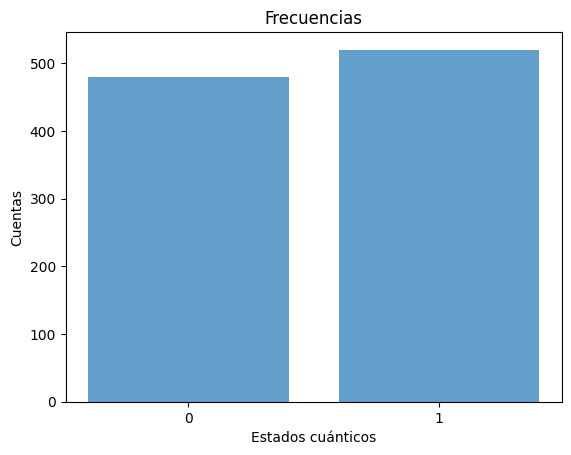

In [104]:
# graficamos en un histograma
plot_histogram(cuentas4)

Vamos a estudiar el análogo cuántico de tirar **dos veces seguidas**  observando el resultado **después de cada tirada** 

Medidas=  Counter({'1': 53, '0': 47})


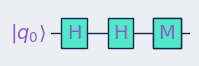

In [105]:
# Programamos un circuito que efectúe dos tiradas y medidas sucesivas. 

# creamos el circuito de un cúbit
qbits = 1
qc5 = Circuit(qbits)

qc5.add(gates.H(0))              # tiramos
qc5.add(gates.M(*range(qbits)))  #observamos
qc5.add(gates.H(0))              # tiramos de nuevo
qc5.add(gates.M(*range(qbits)))  #observamos

#visualizamos el circuito
qsplot_circuit(qc5) 

# ejecutamos un número de veces
Nejecucion = 100
result5 = qc5.execute(nshots=Nejecucion)

medidas5 = result5.frequencies()
print("Medidas= ", medidas5)


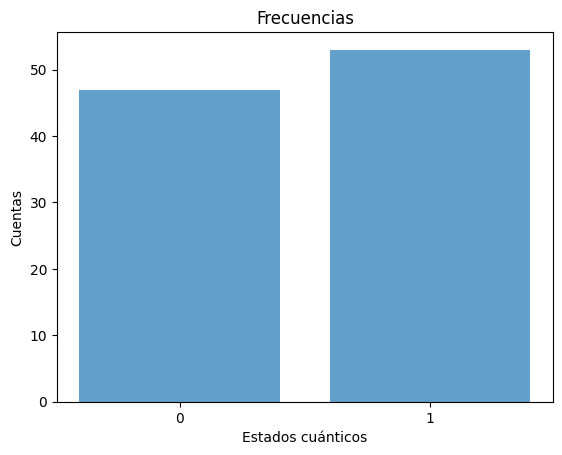

In [106]:
# graficamos en un histograma
plot_histogram(medidas5)

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 

Repite el circuito empezando con $\ket{0}$ o con $\ket{1}$ y observa el resultado. 

¿Es el resultado análogo a lo que sucedería con una moneda clásica?
</div>

¿Qué esperamos que pase con una moneda, si efectuamos **dos tiradas sucesivas**, pero <u>**no miramos entre cada tirada**?</u>

(<Axes: >, <Figure size 180x60 with 1 Axes>)

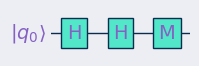

In [107]:
# Programa un circuito que efectúe dos tiradas sucesivas y una sola medida después de la segunda

qbits = 1
qc6 = Circuit(qbits)

qc6.add(gates.H(0))
qc6.add(gates.H(0))
qc6.add(gates.M(*range(qbits)))

# visualizamos el circuito
qsplot_circuit(qc6) 

Medidas=  Counter({'0': 100})


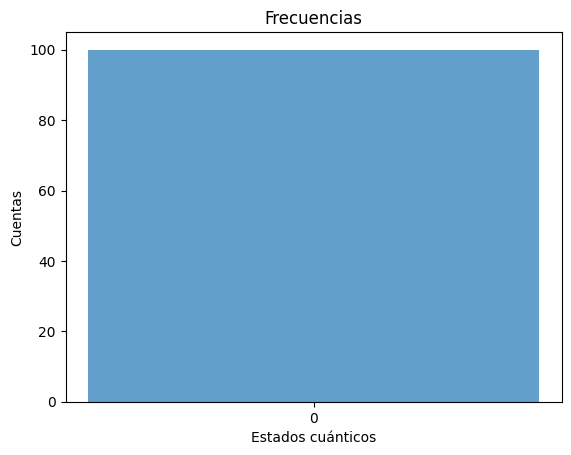

In [108]:
# ejecutamos y medimos un número de veces
medidas6 = qc6.execute(nshots=Nejecucion).frequencies()
print("Medidas= ", medidas6)

# graficamos en un histograma
plot_histogram(medidas6)

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 

Repite el circuito empezando con $\ket{0}$ ó con $\ket{1}$ y observa el resultado. 

</div>

<div class="alert alert-block alert-danger">
    <b>¡ha desaparecido la posibilidad de hallar un resultado distinto al inicial! </b>
<br>    
    
- Si empezamos en $\ket{0}$ (cara)  **siempre** obtendremos $0$  (cara) y **nunca** obtendremos $1$ (cruz)
    
- Si empezamos en $\ket{1}$ (cruz) **siempre** obtendremos $1$ (cruz) y **nunca** obtendremos $0$ (cara)
    
Es decir, hay un resultado que tiene **probabilidad nula** de aparecer en la segunda tirada, a pesar de que *no tiene probabilidad nula* en la primera tirada.     
    
</div>

<div class="alert alert-block alert-success">
<b>Sugerencias para jugar:</b> analiza qué pasa cuando tiras más de dos veces antes de medir. ¿Ves algún patrón?
</div>

## Explicación teórica de la moneda cuántica

Tirar la moneda dos veces es una concatenación de dos procesos probabilísticos. 


- **Moneda clásica**

Clásicamente, el proceso $T$ de tirar la moneda clásica supone poner los estados $cara$ = 0 y $cruz$ = 1 en un estado equiprobable

$$
 T: 0 \rightarrow  \left\{ (0,\frac{1}{2}), ( 1,\frac{1}{2}) \right\} ~~~~~~~~,~~~~~~~~ 
 T: 1 \rightarrow  \left\{ (0,\frac{1}{2}), ( 1,\frac{1}{2}) \right\} 
$$


En este gráfico puedes observar las **probabilidad** de pasar de un estado clásico inicial a otro final por cada camino 

<figure>
<img src="./images/Moneda_clasica.png" align=center width='60%' style='margin:automatic'/>
</figure>
En rojo se han resaltado los posibles caminos para pasar de un 0 inicial a un 1 final. 
Hay dos, y cada uno es una concatenación de dos tiradas independientes. 

La probabilidad de eventos independientes es el producto de las probabilidades,  y la contribución de ambos caminos conduce a 

$$
p(0 \to 1) ~~=~~ \frac{1}{2}\times \frac{1}{2} ~~+~~ \frac{1}{2}\times \frac{1}{2} ~~=~~ \frac{1}{4} + \frac{1}{4} = \frac{1}{2}
$$

En todos los procesos, la contribución de un camino es **siempre positiva**. Por tanto no hay ningún proceso 
$\{0,1\}\to \{0,1\}$ que tenga probabilidad final nula. 

- **Moneda cuántica**

El análogo cuántico del proceso de tirar la moneda es aplicar la puerta $H$ (¡ojo! que ahora, las amplitudes llevan signos)

$$
H : \ket{0} \to \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{0} ~~~~~~, ~~~~~~~
H : \ket{1} \to \frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{0}
$$

En el siguiente diagrama puedes obtener la **amplitud de probabilidad** de pasar de un estado cuántico a otro por cada *camino*

<figure>
<img src="./images/Moneda_cuantica.png" align=center width='65%' style='margin:automatic'/>
</figure>

Ahora, para evaluar la probabilidad de pasar de $\ket{0}$ a $\ket{1}$ primero calculamos la contribución de cada camino a la *amplitud* del estado final


$$
b(0 \to 1) = \frac{1}{\sqrt{2}}\times \frac{1}{\sqrt{2}} ~+~ \frac{1}{\sqrt{2}}\times \left(-\frac{1}{\sqrt{2}}\right)  ~~=~~ \frac{1}{2} - \frac{1}{2}= 0 
$$
<br>

La probabilidad sería ahora $p(\ket{0}\to \ket{1}) = |b|^2 = 0 $.

<div class="alert alert-block alert-danger">
Vemos como, ahora, al sumar <b>amplitudes</b>  hay procesos en los que los caminos pueden interferir destructivamente y cancelarse, haciendo nula la probabilidad final del resultado al que conducen. 
</div>



<div class="alert alert-block alert-success">

Calcula en un papel el resultado de aplicar  $H^2 = H\cdot H$ al estado $\ket{0}$ ó $\ket{1}$ y comprueba que siempre sale el mismo estado con el que empiezas

\begin{align}
H^2 \ket{0} &= H (H\ket{0}) = H  \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})  = 
\frac{1}{\sqrt{2}} \left(  H \ket{0} + H \ket{1}  \right) = ... \\
H^2 \ket{1} &= ...
\end{align}

</div>

## El algoritmo de Bernstein-Vazirani

Vamos a ver un ejemplo en el que la computación cuántica saca ventaja de   la **superposición**, el **paralelismo** y la **interferencia**. 


*Planteamiento del problema de Bernstein Vazirani*

Sea $n\in {\mathbb N}$ un entero natural, y  $a,x$ números enteros positivos $\in (0, 2^n-1)$.


Imaginemos una **colección** de $2^n$ **funciones binarias** etiquetadas por $a$. 

$$\fbox{$f_a: x \to \{0,1\}$}$$

 La función $f_a(x)$ actúa de la siguiente manera 

$$
\fbox{$f_a(x) = a\cdot x ~\equiv~ (a_{n-1} x_{n-1}    ... + a_{0} x_{0})\, \hbox{mod}(2) $}
$$


donde $a = a_{n-1}...a_1a_0$ y  $x = x_{n-1}...x_1x_0$ son las  representaciones binarias de $a$ y $x$ respectivamente

<div class="alert alert-block alert-warning">

<b>Ejemplo</b>:  supongamos que $n=4$. Entonces, por ejemplo
    
\begin{align}
f_3(4) &= 3\cdot 4 =  0011 \cdot 0100 \equiv (0*0 + 0*1 + 1*0 + 1* 0)\,\hbox{mod}(2) =  0 \,\hbox{mod}(2) = 0 \\
f_7(7) &= 7\cdot 7 = 0111 \cdot 0111 \equiv(0*0 + 1*1 + 1*1 + 1* 1)\,\hbox{mod}(2) =  3 \,\hbox{mod}(2) = 1 \\
\end{align}
    
</div>

Ahora definimos la función $f_a(x)$ que podemos evaluar sobre cualquier argumento $x$. El valor de $a$ está oculto (no es un argumento)

In [109]:
# Función f_a(x) lineal clásica
def f_a(x):
    a_bin = format(a, '0' + str(n) + 'b')
    x_bin = format(x, '0' + str(n) + 'b')
    return sum([(int(a_bin[i])*int(x_bin[i])) for i in range(n)])%2 

Vamos a dar valores a $a$ y a $x$ para ver cómo trabaja $f_a(x)$. 

In [110]:
import random 
n=4
a=7
x = 7
x = random.randint(0, 15)

print('x =', x)
print('f_a(' + str(x) + ') =', f_a(x))

x = 8
f_a(8) = 0


<div class="alert alert-block alert-info">

<u><b>Problema de Bernstein-Vazirani</b></u>  
<br>       
- <u>Promesa:</u> <b>disponemos</b> de una función $f_a$,  para un $a$ 
particular **desconocido**
<br>
<br>
    
    
- <u>Problema:</u> queremos <b>adivinar</b> $a$ con el único recurso de evaluar $f_a(x)$ tantas veces como queramos sobre distintos valores de $x$. 
    
    
<br>
    
*Nota: $f_a$ es un *oráculo* al que siempre puedes preguntar todo menos cuál es su identidad*

</div>

<div class="alert alert-block alert-success">

<b>¡A jugar!</b>:  evalua la función "f_a(x)" sobre tantos $x\in (0,2^n-1)$ como necesites para averiguar el valor oculto de $a$.
</div>

Cuando termines, compara tu resultado con el valor correcto de $a$

In [111]:
print('a =',a)

a = 7


<div class="alert alert-block alert-warning">
 El número mínimo de veces que necesitamos consultar $g(x)$ para adivinar $a$ se denomina <em>complejidad de oráculo</em>  ${\cal C}$. En este problema, deberías haber llegado a las conclusión de que ${\cal C} = n$, crece linealmente con el número de cúbits.
</div>

<div class="alert alert-block alert-info">

<u><b>Problema de Bernstein-Vazirani</b></u> *(versión  cuántica)*
<br>
<br>    

Sea $\ket{x}$ un estado de $n$ cúbits, y $\ket{0}$ un cúbit adicional. 
<br> 
<br>    
    
- <i>Promesa:</i> disponemos de un **circuito** que implementa la acción de $f_a$ sobre cualquier estado $\ket{x}\ket{0}$ en la forma siguiente
<br>
<br>
    
$$
U_a : \ket{x} \ket{0}  \to \ket{x} \ket{f_a(x)}
$$
<br>
    
- <i>Problema:</i> queremos **adivinar** $a$ con el único recurso de ejecutar  el circuito $U_a$ y medir el estado final *tantas veces como queramos*. Cada ejecución cuenta como una consulta al oráculo. 
    
    

</div>

Dado un $a$, la siguiente función genera un circuito que implementa $U_a$ 

In [112]:
def U_a():
    a_bin = format(a, '0' + str(n) + 'b')
    qc = Circuit(n+1)
    for qubit in range(n):
        if a_bin[qubit] == '1':
            qc.add(gates.CNOT(qubit+1,0))      
    return gates.Unitary((qc.fuse()).unitary(), *range(n+1), name="U_a")


Vamos a ver que funciona. Para ello tenemos que inicializar el vector $\ket{x}$ y aplicarle $U_a: \ket{x}\ket{0} \to \ket{x}\ket{f_a(x)}$

(<Axes: >, <Figure size 180x300 with 1 Axes>)

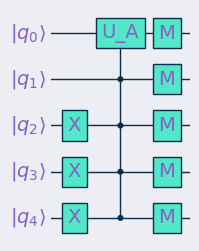

In [113]:
# fijamos un valor de x
a = 7
x = 7

# generamos el circuito 
qc = Circuit(n+1)

# preparamos el estado |x>|0> 
x_bin = format(x, '0' + str(n) + 'b')
for i in range(n):
    if x_bin[i] == '1':
        qc.add(gates.X(i+1))
      
# añadimos el oráculo $U_a$
qc.add(U_a())

# medimos los qúbits
qc.add(gates.M(0, register_name='f(x)'))
qc.add(gates.M(*range(1,n+1), register_name='x'))

#qc.draw()
plot_circuit(qc, cluster_gates = True, style="quantumspain")

In [114]:
# Corremos el circuito 1 vez para ver que efectivamente U_a implementa la función f_a
medidas = qc(nshots=1)
resultado = medidas.samples(registers=True)
x_res = ''.join(str(x) for x in resultado['x'][0]) 
fx_res = str(resultado['f(x)'][0][0])
print('U_a|x>|0> = |x>|f_a(x)> = |' + x_res + '>|' + fx_res + '>')

U_a|x>|0> = |x>|f_a(x)> = |0111>|1>


### Cómo adivinar $a$ con <u>una sola consulta</u> al oráculo cuántico

El circuito de Bernstein-Vazirani utiliza todos los ingredientes que hemos estudiado

1. **Superposición**: aplicando $H^n\ket{0}_n = \ket{0} + \ket{1} + \ket{2} ... +   \ket{2^n-1}$ el estado es una superposición de *todos los elementos de la base
<br>

2. **Paralelismo**: el oráculo $U_a$ se evalúa simultáneamente  sobre <b>todos los elementos</b> de la base computacional y se añade al estado $\ket{-} = Z H \ket{0}$
<br>

3. <b>Interferencia</b>:  aplicando otra vez $H^n$ conseguimos una interferencia destructiva de todos los posibles resultados que no son el correcto, $\ket{a}$. 
<br>

4. <b>Medida</b> del resultado, $\ket{a} \to a$, y conversión a decimal.  

(<Axes: >, <Figure size 300x300 with 1 Axes>)

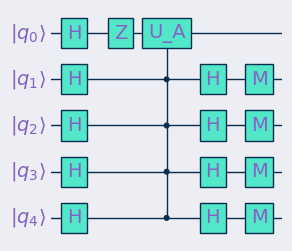

In [115]:
# generamos el circuito 
qc = Circuit(n+1)


# Superposición de todos los elementos de la base
for q in range(0,n+1):
    qc.add(gates.H(q))
qc.add(gates.Z(0))

# Paralelismo:  el oráculo $U_a$ actúa sobre toda la superposición a la vez
qc.add(U_a())

# Interferencia: aplicamos H^n de nuevo
for q in range(1,n+1):
    qc.add(gates.H(q))

# Medidas
qc.add(gates.M(*range(1,n+1), register_name='a'))


# mostramos el diagrama del circuito
plot_circuit(qc, cluster_gates = True, style="quantumspain")

Ejecutamos el circuito una sola vez y observamos el resultado

Cuentas=  Counter({'0111': 1})


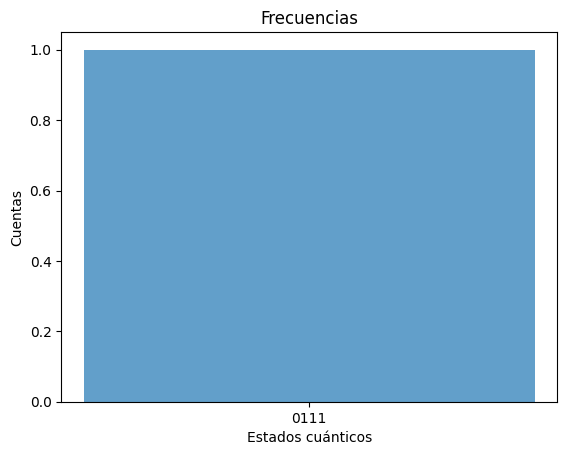

In [119]:
Nejecuciones = 1

cuentas = qc(nshots=Nejecuciones).frequencies(binary=True)
print("Cuentas= ", cuentas)
plot_histogram(cuentas)

In [118]:
print('el valor de a buscado es, a = ', int(list(cuentas.keys())[0],2))

el valor de a buscado es, a =  7


<div class="alert alert-block alert-danger">

<u>**Resumen**</u>: 

hemos visto un ejemplo de *ventaja cuántica* en un problema de *identificación del oráculo*:

- **Clásicamente**, la obtención de $a$ requiere la evaluación de $f_a(x)$ sobre $n$ valores distintos de $x$.

- **Cuánticamente**, la obtención de $a$ requiere **una** única evaluación del circuito que implementa $U_a$ asociado a $f_a$. 

</div>